# Roadmap

$$\text{Relative Response: } T \times (N * B)$$
$$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\downarrow{\frac{\Sigma{\text{ (columns: T)}}} {\text{T in E}}} $$
$$ PSTH $$
<br>
$$\text{T = trials | N = neurons | B = bins | E = events}$$

# Goal
* Create basic Euclidean distance classifier
  * Use classifier to classify tilt type based on the psths
* Use leave-one-out to create an offline confusion matrix
  * Assess performance of the trials offline
  * Extract mutual information from the confusion matrix

# Euclidean Distance
<br>
$$ distance = \sqrt{\Sigma_{b=1:totBins}(PSTH - trial)^2}$$
Dimensions:  
PSTH: 1 X (tot_bins $*$ Neurons)  
Trial: 1 X (tot_bins $*$ Neurons)

# Psuedocode
```py
# Create psth templates for each event
for event in events:
    psth_template = sum(relative_response) / tot_event_trials
```

```py
# Go through each event
for event in events:
```

```py
# Go through each trial
    for trial in event:
        # Recreate current event template without current trial
        curr_response = remove(relative_response, trial)
        psth_template = sum(curr_response) / (tot_event_trials - 1)
        trial_template = trial_response
```

```py
# Go through events and calculate Euclidean distance
        for event in events:
            # apply euclidian distance formula from above
        classified_label = min(euclidean_distance)
        # Append/update list with predicted and true label
```

# Classic Confusion Matrix

<table>
    <tr>
        <th></th>
        <th>Predicted Yes</th>
        <th>Predicted No</th>
    </tr>
    <tr>
        <th>True Yes</td>
        <td>True positive</td>
        <td>False Negative<br/>Type II error</td>
    </tr>
    <tr>
        <th>True No</td>
        <td>False Positive<br/>Type I error</td>
        <td>True Negative</td>
    </tr>
</table>

### Accuracy (performance)
$$Accuracy = \frac{TP + TN}{\text{tot population}}$$

### Sensitivity
$$\text{True Positive Rate} = \frac{TP}{TP+FN}$$

### Specificity
$$\text{True Negative Rate} = \frac{TN}{TN+FP}$$

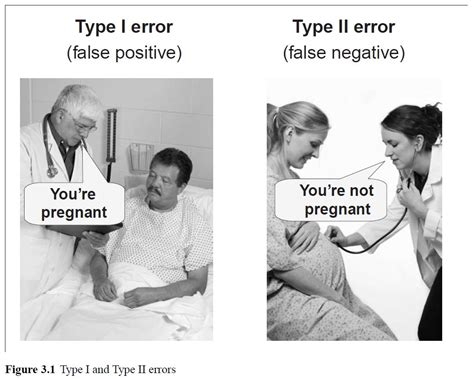
Ellis, P. D. (2016). The essential guide to effect sizes: statistical power, meta-analysis, and the interpretation of research results. Cambridge: Cambridge University Press.

# Classification Confusion Matrix
<style>
    table {
        border-collapse: collapse;
    }
    .rendered_html table, th, td {
        table-layout: fixed;
        border-collapse: collapse;
        border: 1px solid black !important;
    }
</style>
<table align="center">
    <tr>
        <th></th>
        <th>Predicted 1</th>
        <th>Predicted 2</th>
        <th>Predicted 3</th>
        <th>Predicted 4</th>
    </tr>
    <tr>
        <th>True 1</td>
        <td>40</td>
        <td>27</td>
        <td>2</td>
        <td>0</td>
    </tr>
    <tr>
        <th>True 2</td>
        <td>19</td>
        <td>47</td>
        <td>3</td>
        <td>1</td>
    </tr>
    <tr>
        <th>True 3</td>
        <td>10</td>
        <td>6</td>
        <td>47</td>
        <td>18</td>
    </tr>
    <tr>
        <th>True 4</td>
        <td>1</td>
        <td>1</td>
        <td>24</td>
        <td>54</td>
    </tr>
</table>

### Information Confusion
<br>
$$I = H_a + H_b - H_{ab}$$
$$H_a = \text{row entropy} | H_b = \text{col entropy} | H_{ab} = \text{joint info}$$

### Entropy
* Find probability of given row/column (p(a), p(b))
* Find probability of each entry in confusion matrix (p(ab))
$$H_a = -\Sigma{p(a)log_2(p(a))}$$

# Analysis Psuedocode
```py
# Analyze results from leave one out offline classification
performance = correct_classification / tot_trials
confusion_matrix = create_confusion_matrix(true_labels, predicted_labels)
# Calculate entropy for rows, cols, and each index in table
info = h_rows + h_cols - h_joint
```

# What to turn in
## Conceptual Questions (10pts)
* pdf with answers to conceptual questions
* Code files you wrote to create JSON output file
* Code files should be plain text with proper file extension
  * ex: last_first_hw3.m, last_first_hw3.py, etc.

# Json Output File (10pts)
* This file will be input into automatic grader
* This was taken from the example solution json and is a small snippet
* You are not required to turn in a pretty formatted json file
```json
{
    "bin_200ms": {
        "performance": 0.6266666666666667,
        "confusion_matrix": [
            [
                40,27,2,0
            ],
            [
                19,47,3,1
            ],
            [
                10,6,47,18
            ],
            [
                1,1,24,54
            ]
        ],
        "mutual_info": 0.7499828172100611
    }
}
```